# ABILLION Data Set ANALYSIS
In this notebook, I will be breaking down the abillion usage data table and drawing conclusions and creating visualizations out of them.


In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

First we begin by importing the data and looking at what kind of features are being given

In [2]:
#Importing the Data
data = pd.read_csv('abillion.csv')
data.head()

,reviewText,reviewBrand,brandCategory,country,reviewDate,likesCount,commentsCount
0,These are delicious! Great in red sauce with p...,1,food,United States,2021-01-01 00:00:03.210,1.0,0
1,I love having these for a quick lentil taco di...,2,food,United States,2021-01-01 00:00:12.792,0.0,0
2,Love this vegan lip balm. Leaves lips soft wit...,3,health and beauty,United States,2021-01-01 00:00:33.411,0.0,0
3,This soup is great on its own or paired with v...,4,food,United States,2021-01-01 00:01:33.378,0.0,0
4,Lingerie for those lips ladies! Great selectio...,5,health and beauty,United States,2021-01-01 00:02:17.036,0.0,0


In order to understand the data, we need to look at the data types and some other basic statistics about it

In [6]:
#Understanding Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96019 entries, 0 to 96018
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewText     96019 non-null  object 
 1   reviewBrand    96019 non-null  int64  
 2   brandCategory  96019 non-null  object 
 3   country        92133 non-null  object 
 4   reviewDate     96019 non-null  object 
 5   likesCount     96019 non-null  float64
 6   commentsCount  96019 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.1+ MB


In [86]:
#Basic Statistics from the Data
data.describe()

,reviewBrand,likesCount,commentsCount
count,96019.000000,96019.000000,96019.000000
mean,3605.324196,5.338766,0.358190
std,4249.548436,8.340187,1.495902
min,1.000000,-1.000000,0.000000
25%,516.000000,1.000000,0.000000
50%,1686.000000,3.000000,0.000000
75%,5195.000000,6.000000,0.000000
max,17008.000000,200.000000,73.000000


## Dividing the Dataset into smaller workable tables 


Since there are 3 categories of brands, I divided them into 3 tables respecitive of the brands so I can analyze the data among its common competitors.
As we can see below, food is the biggest brand category being used on the aBillions app so one can assume most people use it to share pictures of ***food***. It may be more profitable to push new features and promotions around food related content.

In [88]:
#finding total composition of different types of categories
uniquebrand = data['brandCategory'].value_counts()
uniqueBrand = pd.DataFrame(uniquebrand)
fig = px.pie(uniqueBrand, names= uniqueBrand.index, values = uniqueBrand['brandCategory'],
             title='Brand Category Make up',
             hover_data=uniqueBrand, )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [9]:
#Seperating Data Table into 3 seperate data sets
apparel = data[data['brandCategory'] == 'apparel']
food = data[data['brandCategory'] == 'food']
hb = data[data['brandCategory'] == 'health and beauty']

## Visualizations of various Countries who actively use the app
I break down each table and group them by countries to find the countries that have most post interactions in each type of category. I am looking for high low likes to comments ratio because it means that the interactions on the posts are genuine. With a low ration a user will be more likely to leave a comment whenever they like a photo. But if the ratio is high that means many users are just liking pictures and moving on without much afterthought. This could point to bots or un-engaging posts.

In [97]:
countrylikes = apparel.groupby(['country'], as_index=False)['likesCount', 'commentsCount'].sum()
countrylikes = countrylikes.sort_values(by = ['likesCount'], ascending = False)
fig = px.bar(countrylikes, x='country', y='likesCount',
             hover_data=['country', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = 'Apparel Posts')
fig.show()

* Here we see that Spain has the highest number of likes on Apparel related posts meaning that their users tend to care more about clothing products than the rest of the aBillions userbase.
***

In [98]:
countrylikes['likes:comments'] = countrylikes['likesCount'] / countrylikes['commentsCount']
countrylikes.replace([np.inf, -np.inf], np.nan, inplace=True)
fig = px.bar(countrylikes, x="likes:comments", y="country", orientation='h', title = "Likes / Comments for Apparel")
fig.show()

* South African users have the highest like to comments ratio in the apparel section. While Austria has the most even like to comment ratio with almost a 1 to 1 ration.
***

In [77]:
foodcountrylikes = food.groupby(['country'], as_index=False)['likesCount', 'commentsCount'].sum()
foodcountrylikes = foodcountrylikes.sort_values(by = ['likesCount'], ascending = False)
fig = px.bar(foodcountrylikes, x='country', y='likesCount',
             hover_data=['country', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = 'Food Posts')
fig.show()

* United States have the highest number of likes when it the food category so the American users seem to be highly interactive with food posts on the app.
***

In [82]:
foodcountrylikes['likes:comments'] = foodcountrylikes['likesCount'] / foodcountrylikes['commentsCount']
foodcountrylikes.replace([np.inf, -np.inf], np.nan, inplace=True)
fig = px.bar(foodcountrylikes, x="likes:comments", y="country", orientation='h', title = "Likes / Comments for Food")
fig.show()

* Japan has the biggest like to comments ratio signifying that their users to like pictures more often than leaving a comment. Paraguay has the lowest like to comment ratio at 3. Their users tend to leave 1 comment for every 3 likes for their pictures.

***

In [83]:
hbcountrylikes = hb.groupby(['country'], as_index=False)['likesCount', 'commentsCount'].sum()
hbcountrylikes = hbcountrylikes.sort_values(by = ['likesCount'], ascending = False)
fig = px.bar(hbcountrylikes, x='country', y='likesCount',
             hover_data=['country', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = 'Health and Beauty Posts')
fig.show()

* Argentina has the most amount of likes when it comes to posts related to Health and Beauty.
***

In [84]:
hbcountrylikes['likes:comments'] = hbcountrylikes['likesCount'] / hbcountrylikes['commentsCount']
hbcountrylikes.replace([np.inf, -np.inf], np.nan, inplace=True)
fig = px.bar(hbcountrylikes, x="likes:comments", y="country", orientation='h', title = "Likes / Comments for HB")
fig.show()

* Netherlands has the highest Likes to Comments ratio meaning their like pictures more than while New Zealand has the lowest ratio meaning they leave 1 comment for almost every 2 likes. 

## Brand Popularity based on Countries

In [16]:
brandlikes = apparel.groupby(['reviewBrand', 'country'], as_index = False)['likesCount'].sum()
brandlikes = brandlikes.sort_values(by = ['likesCount'], ascending = False)
brandlikes = brandlikes[brandlikes.likesCount > 30]
#top10apparelbrand = brandlikes[:10]
fig = px.bar(brandlikes, x='country', y='likesCount',
             hover_data=['reviewBrand', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = "Apparel Popularity")
fig.show()

* United Kingdom has the most amount of popular brands in the Apparel Category. UK users enjoy their clothing products so it can be a focal points for focusing apparel heavy advertisements in that country.
***

In [17]:
foodbrandlikes = food.groupby(['reviewBrand', 'country'], as_index = False)['likesCount'].sum()
foodbrandlikes = foodbrandlikes.sort_values(by = ['likesCount'], ascending = False)
foodbrandlikes = foodbrandlikes[foodbrandlikes.likesCount > 30]
#top10apparelbrand = brandlikes[:10]
fig = px.bar(foodbrandlikes, x='country', y='likesCount',
             hover_data=['reviewBrand', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = "Food Popularity")
fig.show()

* United States has the most amount of popular brands in the Food Category with more popularity than the rest of the countries resulting in the number 1 ranking. United States could be a hotspot for companiwa to promote new brands since there is such a high user popularity for varieties of food related products.
***

In [18]:
hbbrandlikes = hb.groupby(['reviewBrand', 'country'], as_index = False)['likesCount'].sum()
hbbrandlikes = hbbrandlikes.sort_values(by = ['likesCount'], ascending = False)
hbbrandlikes = hbbrandlikes[hbbrandlikes.likesCount > 30]
#top10apparelbrand = brandlikes[:10]
fig = px.bar(hbbrandlikes, x='country', y='likesCount',
             hover_data=['reviewBrand', 'likesCount'], color='country',
             labels={'Likes'}, height=400, title = "Health and Beauty Popularity")
fig.show()

* Argentina has the most health and beauty related posts by a large margin than the rest of the countries. Advertisements can be more focused around health and beauty products when targeting users from Argentina.
***

In [25]:
import nltk
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/zaha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Counting the Most Common Words in the captions

With this visualization, I wanted to see if there were any distinct words that were common among the captions for posts. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

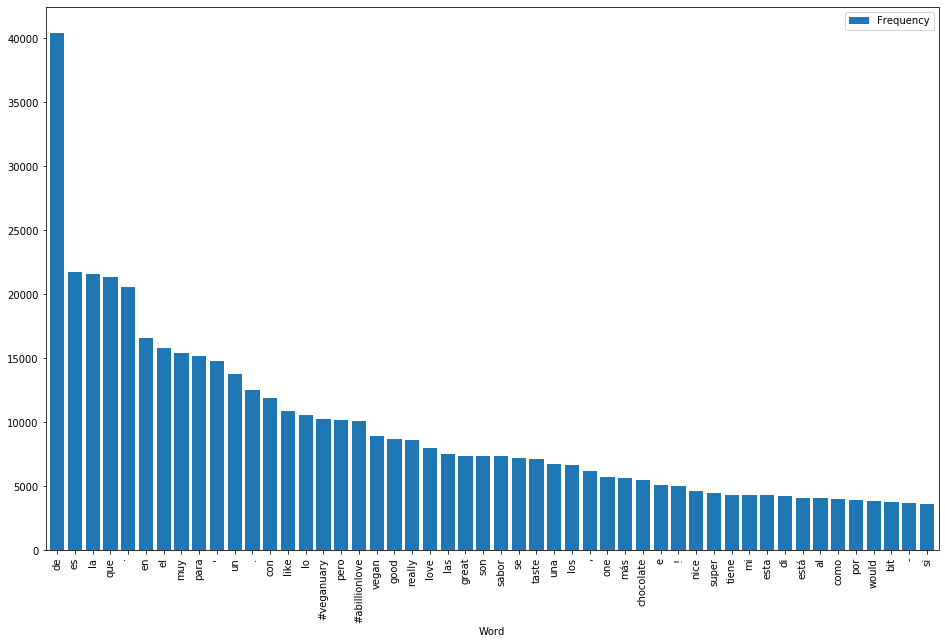

In [85]:
top_N = 50
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (data.reviewText
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.xticks(rotation=90)


* The most common words really stood out to me were #vegananuary, #abillionlove, vegan, and chocolate. I believe this points to the fact that many of the users are posting pictures related to a vegan diet with other users. There were also a high number of spanish originating words meaning there is a overall high spanish userbase.

***